In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'input_data.xlsx'
data = pd.read_excel(file_path)
data.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1


In [3]:
label_encoder = LabelEncoder()
data['product_name_encoded'] = label_encoder.fit_transform(data['product_name'])

In [4]:
encoded_country = pd.get_dummies(data['country'], prefix='country')
data = pd.concat([data, encoded_country], axis=1)

In [5]:
numeric_columns = ['duration', 'age', 'price', 'insurance_amount', 'loss_payout_amt', 'price_usd', 'insurance_amount_usd', 'loss_payout_amt_usd']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [7]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clustering.fit_predict(scaled_data)

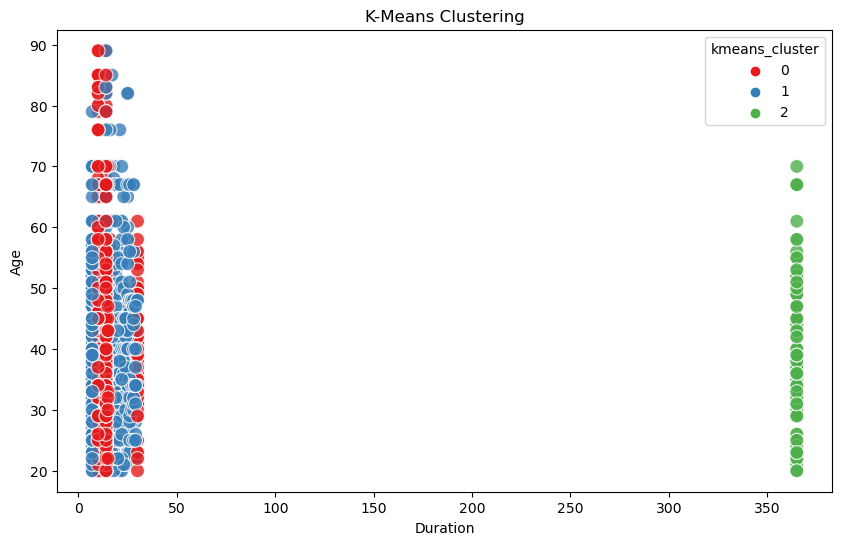

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='age', hue='kmeans_cluster', data=data, palette='Set1', s=100, alpha=0.8)
plt.title('K-Means Clustering')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.show()

In [9]:
cluster_means = data.groupby('kmeans_cluster').mean()
print(cluster_means)

                  duration        age         price  insurance_amount  \
kmeans_cluster                                                          
0                12.446809  39.770905   1543.509649      2.178501e+06   
1                15.098797  40.119696   3932.756808      4.764123e+06   
2               365.000000  39.954955  55297.297297      2.764865e+06   

                loss_payout_amt   price_usd  insurance_amount_usd  \
kmeans_cluster                                                      
0                    371.103414   18.079405          25538.510725   
1                   5585.813806   48.656826          58704.845028   
2                   4054.054054  786.843245          39342.162272   

                loss_payout_amt_usd   anomaly  product_name_encoded  ...  \
kmeans_cluster                                                       ...   
0                          4.204602  0.553686              0.017318  ...   
1                         94.594110  0.568081              0

C:\Users\abuza\AppData\Local\Temp\ipykernel_17696\517916877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('kmeans_cluster').mean()


# Кластерные профили

Кластер 0 имеет относительно низкую продолжительность и возраст, а также умеренную цену и страховую сумму. Сумма выплаты убытков также ниже по сравнению с другими кластерами.

Кластер 1 показывает более высокие значения для продолжительности, возраста, цены и страховой суммы, с значительно более высокой суммой выплаты убытков.

Кластер 2 выделяется экстремально высокой продолжительностью, относительно низким возрастом, очень высокой ценой, а также умеренной страховой суммой и суммой выплаты убытков.

# Валютные соображения

Столбцы price_usd, insurance_amount_usd и loss_payout_amt_usd предоставляют информацию о конвертации валют для различных кластеров. Это может указывать на необходимость стратегий или продуктов, ориентированных на конкретные валюты.

# Географическое распределение

Закодированные признаки страны показывают распределение клиентов из разных стран в каждом кластере. Эта информация может быть ценной для настройки маркетинговых стратегий или понимания региональных предпочтений.

# Анализ аномалий

Столбец 'anomaly' указывает на наличие аномалий внутри кластеров, которые могут быть дополнительно исследованы для понимания характеристик этих выбросов.

# Агрегированная информация о кластерах

Столбец 'agg_cluster' может представлять агрегированный взгляд на кластеры, обеспечивая общую классификацию или группировку на основе объединенных характеристик.